# Embed a trivial 3 dimensional dataset to 2 dimensions

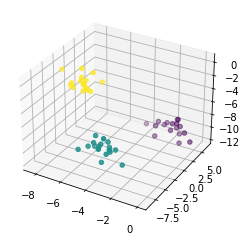

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=3, n_features=3, random_state=1)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)

plt.show()

Epoch 1/5
2500/2500 [==============================] - 37s 15ms/step
Total loss: 4063.021728515625
Epoch 2/5
2500/2500 [==============================] - 40s 16ms/step
Total loss: 724.1920776367188
Epoch 3/5
2500/2500 [==============================] - 40s 16ms/step
Total loss: 585.91455078125
Epoch 4/5
2500/2500 [==============================] - 41s 16ms/step
Total loss: 528.3983764648438
Epoch 5/5
2500/2500 [==============================] - 45s 18ms/step
Total loss: 480.8893127441406


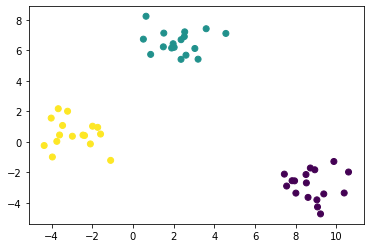

In [8]:
from saepipe import EmbeddingPipeline
from numpy.linalg import norm
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10))
model.add(Dense(2))

difference = lambda a, b: norm(a - b)
pipeline = EmbeddingPipeline(model, 2).train(X, difference, epochs=5)

X_pred = pipeline.predict(X)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_pred[:, 0], X_pred[:, 1], c=y)

plt.show()
